# <center>USA ADULT INCOME CLASSIFICATION</center>

#### Ce notebook portera sur la prédiction du salaire en Amérique en se basant sur la manipulation de plusieurs d'autres fonctionnalités.
    
#### On sera amené à Comprendre tout d'abord nos données , les nettoyer ,les transformer puis créer nos modèles machine Learning à savoir : KNN - Decision Trees et Random Forest ou « forêts aléatoires » qui  est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.
#### Finalement les faire entraîner sur l'ensemble de données traité et interpréter les résultats obtenus.

## 1. Importation des librairies:

In [116]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import pointbiserialr, spearmanr
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import missingno as msno 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold

## 2. Importation de la dataset:

In [117]:
url1="train.csv"
url2="test.csv"
train= pd.read_csv(url1)
test=pd.read_csv(url2)

## 3.Affichage du contenu des deux ensembles de données:

In [118]:
print(train.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [119]:
print(test.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [120]:
print(train.shape)
train.head(10)

(32561, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [121]:
print(test.shape)
test.head(10)

(16281, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [27]:
print(train.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  32561.000000  3.256100e+04     32561.000000  32561.000000   
mean      38.581647  1.897784e+05        10.080679   1077.648844   
std       13.640433  1.055500e+05         2.572720   7385.292085   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178270e+05         9.000000      0.000000   
50%       37.000000  1.783560e+05        10.000000      0.000000   
75%       48.000000  2.370510e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [28]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [29]:
train.describe(include=['object'])


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### On va visualiser les champs de données dans des diagrammes de la librairie seaborn:

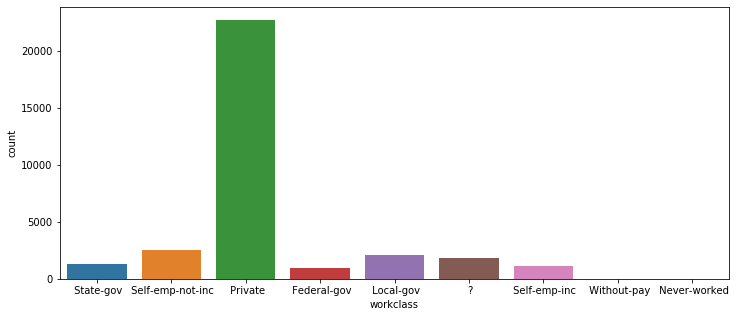

In [30]:
#visualisation de "workclass"
fig,ax= plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train,x='workclass',ax=ax)
plt.show()

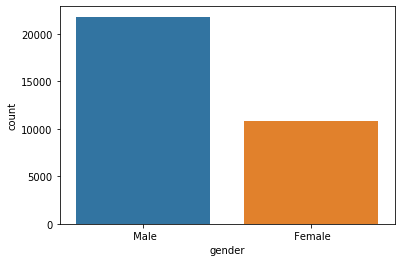

In [31]:
#visualisation de "gender"
train.gender.value_counts()
sns.countplot(x="gender", data=train)

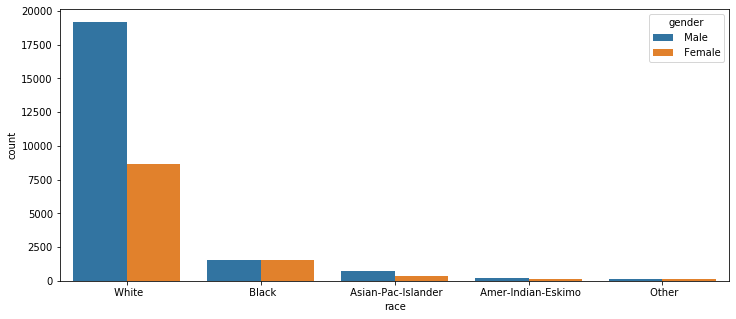

In [32]:
#visualisation de "race" en fonction de "gender"
fig,ax= plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train,x='race',ax=ax,hue='gender')
plt.show()

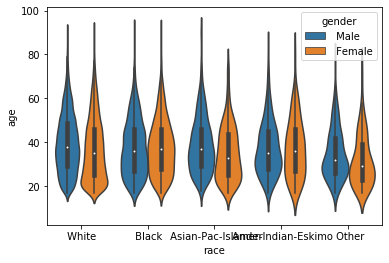

In [33]:
#visualisation de "race" en fonction de "gender"
sns.violinplot(data=train, x='race',y='age',hue='gender')
plt.show()

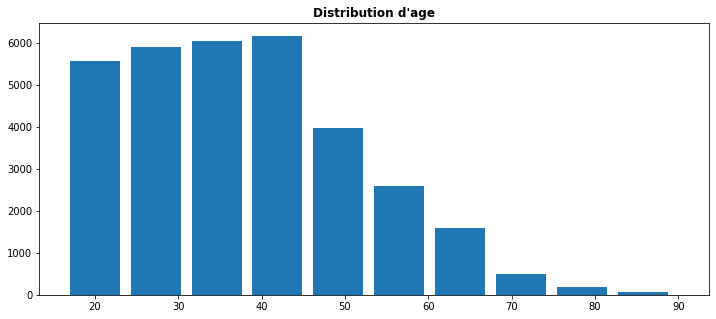

In [34]:
#visualisation dedistribution d'age

fig,ax= plt.subplots(1,1,figsize=(12,5))
ax.hist(train['age'],width=6)
ax.set_title("Distribution d'age",fontweight='bold')
plt.show()

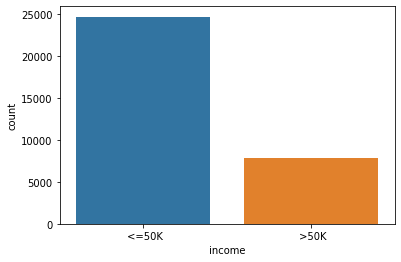

In [35]:
#visualisation de "income" 

sns.countplot(x="income", data=train)


#####  On constate qu'on a  :

##### les valeurs numériques sont : (age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week, income)

##### Les valeurs categoriques sont : (workclass, education, marital.status, occupation, relationship, race, sex, native.country)

In [122]:
val_num=['age','fnlwgt','educational-num','capital-gain','capital-loss', 'hours-per-week','income']
val_cat=[ 'workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028AF89B3708>,
      dtype=object)

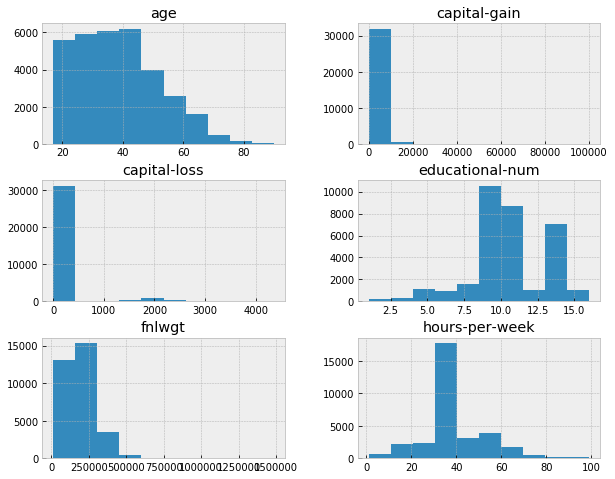

In [1693]:
train[val_num].hist()


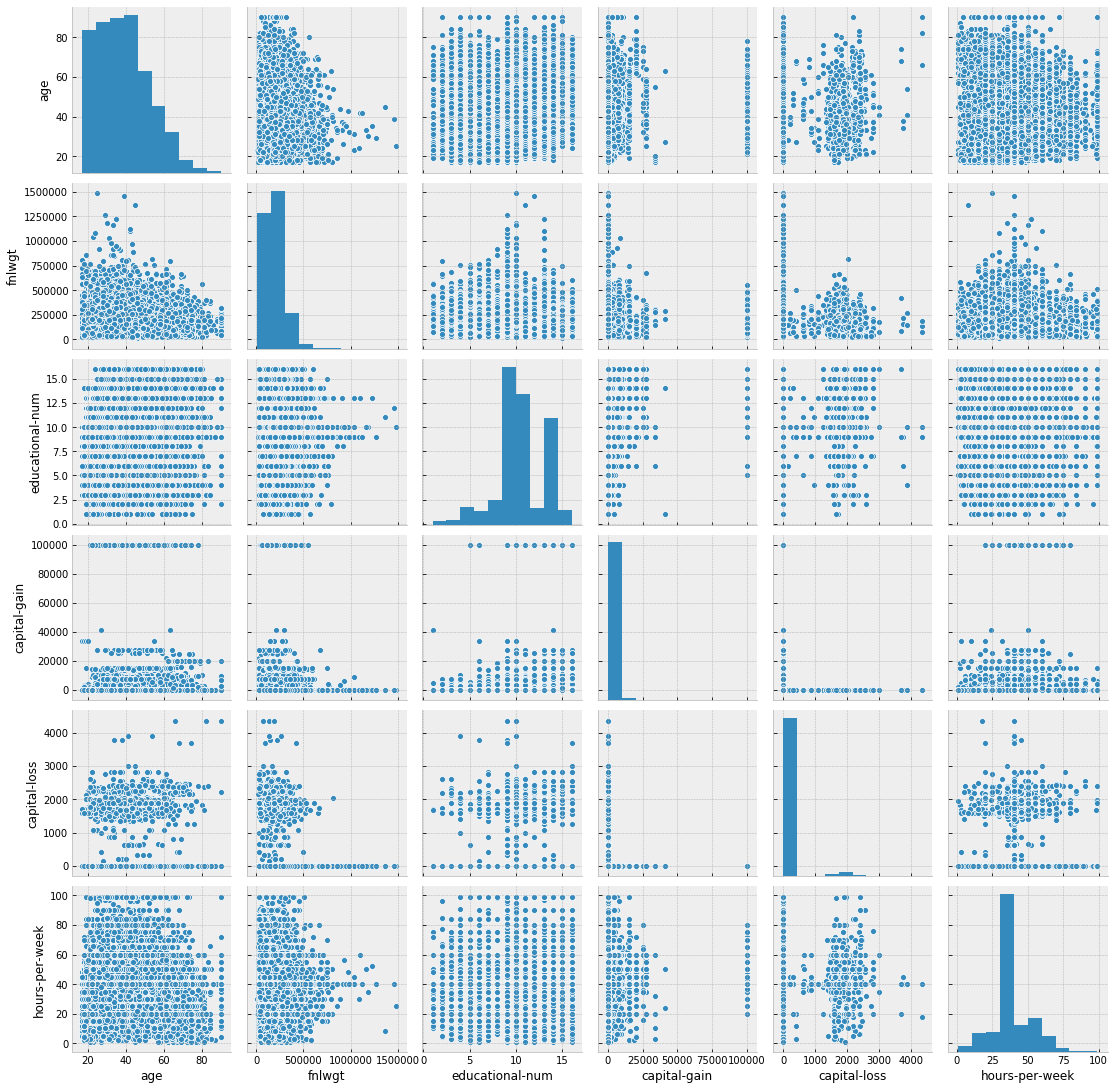

In [1694]:
sns.pairplot(train) 

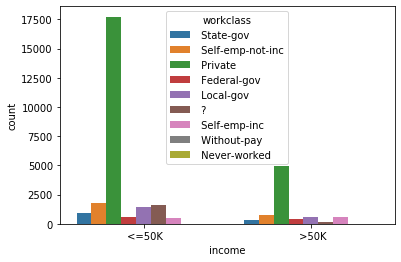

In [123]:
sns.countplot(x = 'income', hue = 'workclass', data = train)


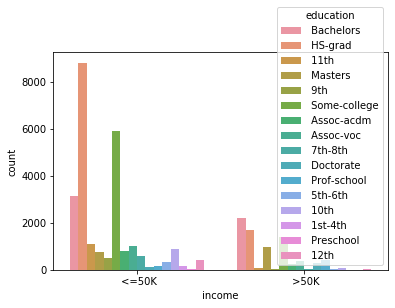

In [40]:
sns.countplot(x = 'income', hue = 'education', data = train)


In [60]:
train['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
train['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

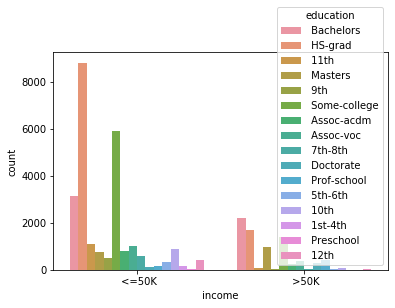

In [61]:
sns.countplot(x = 'income', hue = 'education', data = train)


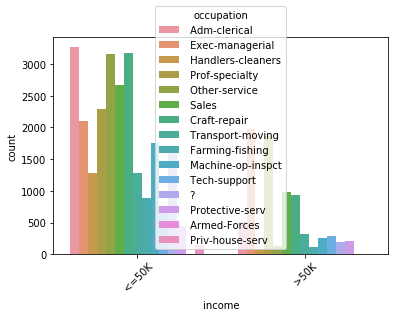

In [43]:
plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = train)

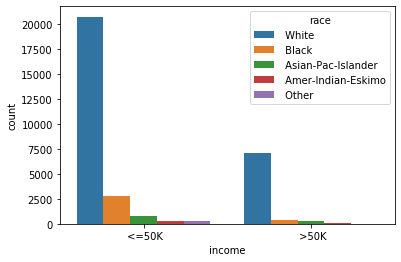

In [44]:
sns.countplot(x = 'income', hue = 'race', data = train)


In [62]:
train['race'].unique()
train['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

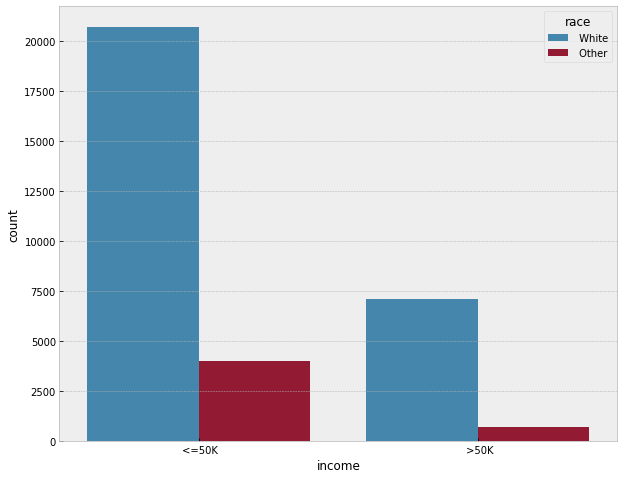

In [1707]:
sns.countplot(x = 'income', hue = 'race', data = train)


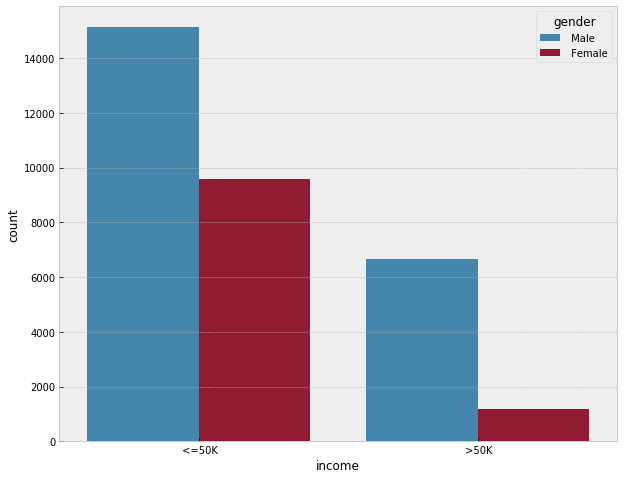

In [1708]:
sns.countplot(x = 'income', hue = 'gender', data = train)


In [63]:
countries = np.array(train['native-country'].unique())
countries = np.delete(countries, 0)

In [64]:
train['native-country'].replace(countries, 'Other', inplace = True)


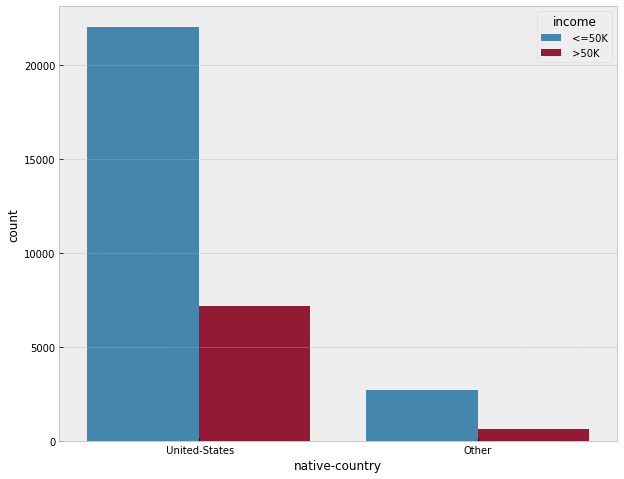

In [1711]:
sns.countplot(x = 'native-country', hue = 'income', data = train)


## 4.Nettoyage des données:

In [124]:
train = train.fillna(np.nan)
#Conversion des données nulles en nan

### Visualisation les valeurs manquantes:

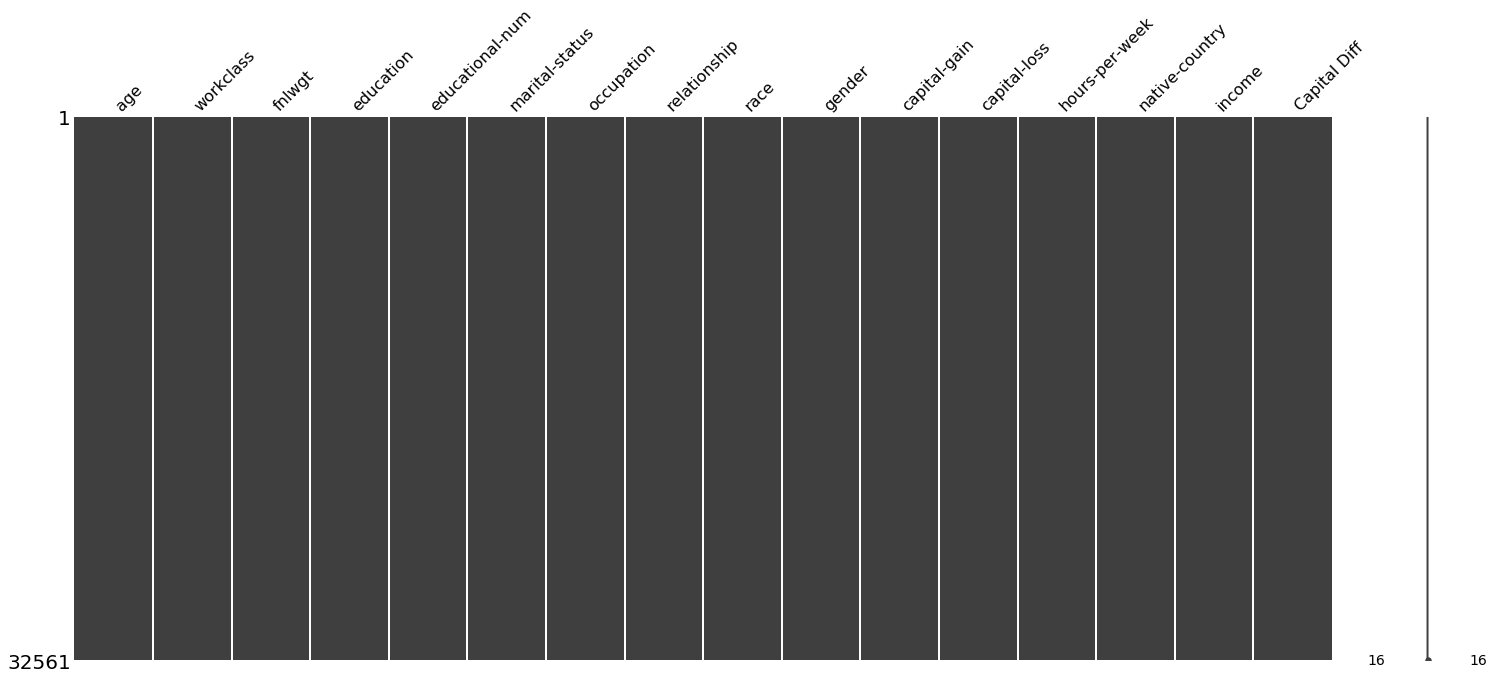

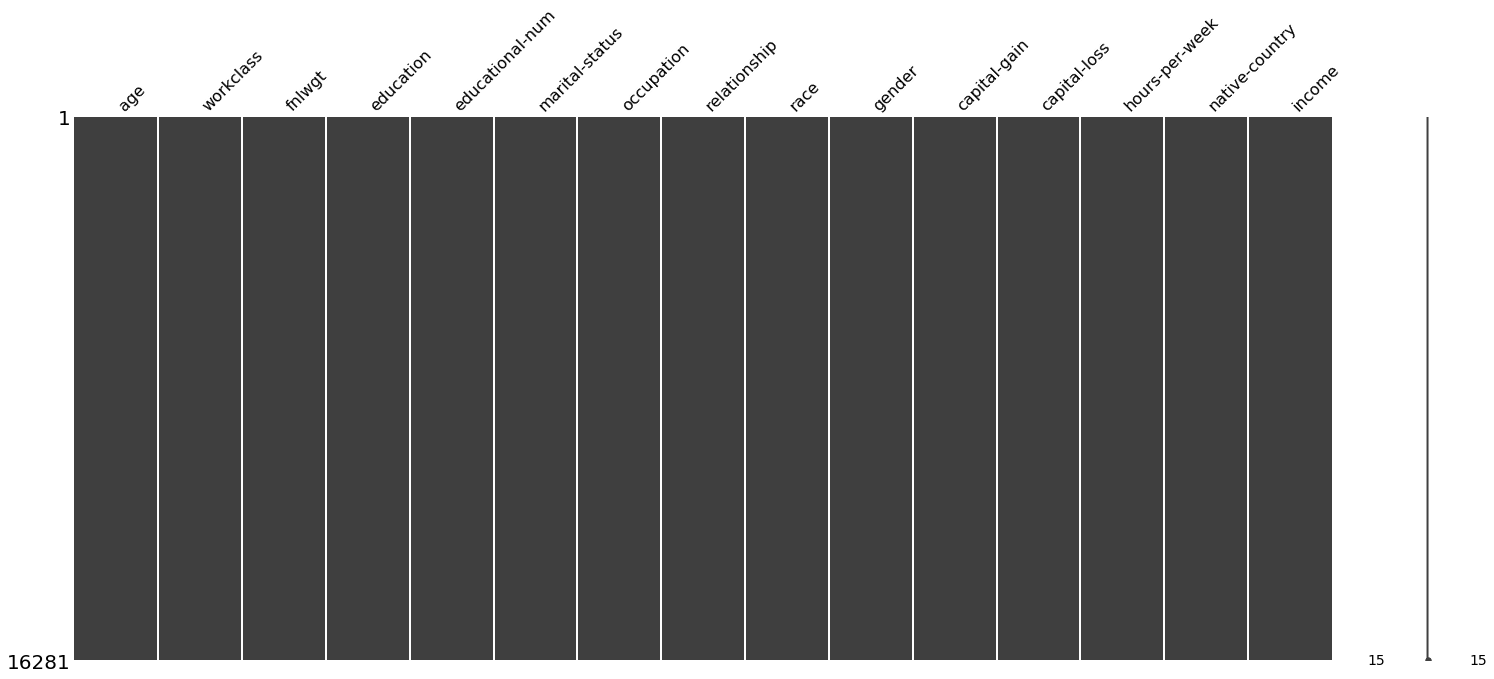

In [1713]:
msno.matrix(train) 
msno.matrix(test) 

In [1714]:
train.isnull().any().sum()


0

In [1715]:
test.isnull().any().sum()


0

### visualisation du pourcentage de valeurs manquantes de la dataset

In [66]:
nan_percentage =train.isna().sum() * 100 / len(train)
missing_percentage_train = pd.DataFrame({'column_name': train.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_train

,column_name,percent_missing
0,age,0.0
1,workclass,0.0
2,fnlwgt,0.0
3,education,0.0
4,educational-num,0.0
5,marital-status,0.0
6,occupation,0.0
7,relationship,0.0
8,race,0.0
9,gender,0.0


### On remarque que la dataset ne contient pas de valeurs manquantes

## 5. DATA ENGINEERING:

### Maintenant Notre target est la valeur income ,on devera donc la transformer à une valeur numerique tel que :

### -Supérieur à 50k ==> 1

### -Inférieur à 50k ==> 0

In [49]:
train['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [125]:
train['income']=train['income'].astype(str)
train['income'].replace({' <=50K': 0,' >50K': 1}, inplace=True)
train.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Visualisation des correlations des valeurs numeriques avec income:

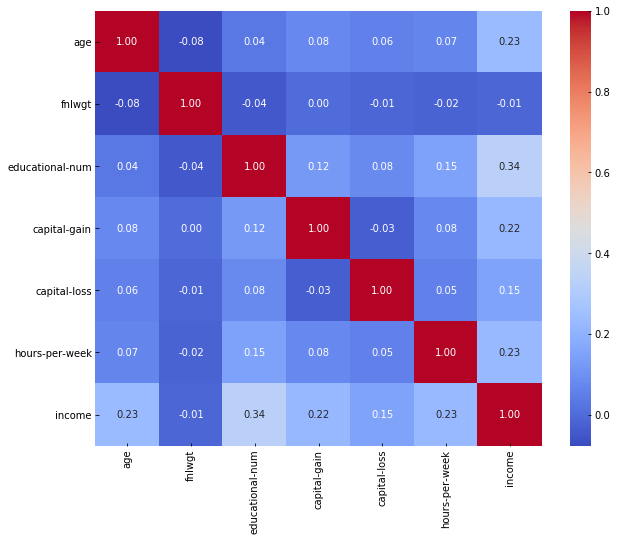

In [1719]:
cor_mat = sns.heatmap(train[val_num].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

#### On transformera les valeurs categoriales qu'on garedera en numériques:

In [1720]:
train.gender.unique()

array([' Male', ' Female'], dtype=object)

In [126]:
# On change Gender en 0 ou 1
train["gender"]=train["gender"].astype(str)

train["gender"].replace({" Male":1, " Female":0},inplace=True)
train.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [127]:
#On changerea le champs marital-status categorial en valeur numerique (0 et 1)
train["marital-status"]=train["marital-status"].astype(str)
train["marital-status"] =train["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
train["marital-status"] =train["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
train["marital-status"].replace({"Married":1, "Single":0},inplace=True)
train.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,1,Exec-managerial,Wife,White,0,0,0,40,United-States,0
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,1,Exec-managerial,Husband,White,1,0,0,45,United-States,1
8,31,Private,45781,Masters,14,0,Prof-specialty,Not-in-family,White,0,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,1,Exec-managerial,Husband,White,1,5178,0,40,United-States,1


### On supprimera les features qui ont une faible corrélation avec la valeur income et qui ne contribuent pas fortement dans la prédiction de la valeur du salaire ,et comme il est observé ,les champs qui n'ont pas une forte corrélation avec income sont:

### "workclass","education","occupation","relationship","race","native-country"

#### 1.pour l'attribut "workclass","occupation" et "native-country":y en existe un tres grand nombre de types ,ce qui rend  difficile de convertir les valeurs categoriales de ce champs en valeurs numeriques et extraire du sens
#### 2.pour l'attribut "relationsip":est dans le meme sens que l'attribut "marital-status" ,egalement pour "education" et "educational-num" ce qui fait que sa suppression sera rationnelle en terme d'éviter la redondonce
#### 3."race"  il apparait qu'il n'a pas de correlation forte avec "income"


In [128]:
#suppression des champs ayant faible contribution
train.drop(labels=["workclass","education","occupation","relationship","race","native-country"], axis = 1, inplace = True)
print(train.head())

   age  fnlwgt  educational-num  marital-status  gender  capital-gain  \
0   39   77516               13               0       1          2174   
1   50   83311               13               1       1             0   
2   38  215646                9               0       1             0   
3   53  234721                7               1       1             0   
4   28  338409               13               1       0             0   

   capital-loss  hours-per-week  income  
0             0              40       0  
1             0              13       0  
2             0              40       0  
3             0              40       0  
4             0              40       0  


In [129]:
# fractionnement de l'Ensemble de données en apprentissage et validation(20%) et création de variables de test
array = train.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

Split Data: X
[[    39  77516     13 ...   2174      0     40]
 [    50  83311     13 ...      0      0     13]
 [    38 215646      9 ...      0      0     40]
 ...
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 0 ... 0 0 1]


## 6. Creation des Modèles Machine Learning:

In [130]:
# Création des paramètres du modèle :Random Forest
num_trees = 100
max_features = 3

In [131]:
#Création des trois modèles :
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

### Entrainement des modèles:

In [132]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.776681 (0.006029)
DT: 0.805705 (0.004224)
RF: 0.840371 (0.007261)


## Visualisation et comparaison entre la performance des trois modèles

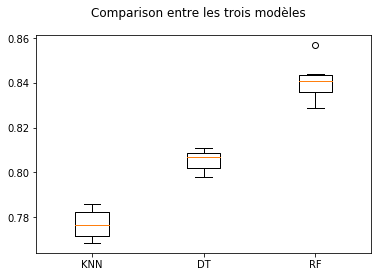

In [133]:
fig = plt.figure()
fig.suptitle('Comparison entre les trois modèles')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### On remarque donc que le modele ayant la plus grande précision est celui de Random Forest ,en comparaison avec celui de Desicion Trees et KNN 
### On essayera par la suite donc de faire améliorer ce de dernier pour avoir plus de précision que celle deja resultante en utilisant la technique de validation croisée:

In [134]:
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed ,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.840640 using {'max_features': 1, 'n_estimators': 100}
0.838605 (0.005922) with: {'max_features': 1, 'n_estimators': 50}
0.840640 (0.007016) with: {'max_features': 1, 'n_estimators': 100}
0.839181 (0.007551) with: {'max_features': 1, 'n_estimators': 150}
0.839642 (0.006826) with: {'max_features': 1, 'n_estimators': 200}
0.839872 (0.007360) with: {'max_features': 1, 'n_estimators': 250}
0.838221 (0.007294) with: {'max_features': 2, 'n_estimators': 50}
0.839181 (0.005538) with: {'max_features': 2, 'n_estimators': 100}
0.838298 (0.006242) with: {'max_features': 2, 'n_estimators': 150}
0.838874 (0.006855) with: {'max_features': 2, 'n_estimators': 200}
0.837415 (0.007533) with: {'max_features': 2, 'n_estimators': 250}
0.839450 (0.007371) with: {'max_features': 3, 'n_estimators': 50}
0.839795 (0.007868) with: {'max_features': 3, 'n_estimators': 100}
0.839373 (0.006147) with: {'max_features': 3, 'n_estimators': 150}
0.840218 (0.007048) with: {'max_features': 3, 'n_estimators': 200}
0.8

## Visualisation des résultats y inclus l'exatitude,le  précision,le F-score et Rappel:


In [135]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.07799785045295%
[[4526  425]
 [ 612  950]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4951
           1       0.69      0.61      0.65      1562

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



## Visualisation de Matrice de confusion:

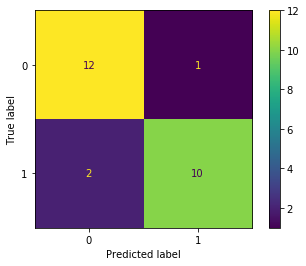

In [138]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

### On remarque finalement que le modele "random Forest "a pu résulter sur l'échelle de 12 , 10 Trues Positives (salaire >50K)  ,ainsi que 12 pour les True negatives (salaire<50K) , par contre le modèle avait tord pour prédire quelques valeurs tel que les False positives et False negatives représentent  seulement 1 et 2 sur l'échelle de 12. 